<a href="https://colab.research.google.com/github/nguyenthiyenvi20130463/ML2023_TV201/blob/main/Lab_7_20130463_NguyenThiYenVi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [1]:
# import
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [2]:
#code
dataSet = datasets.load_iris()
X = dataSet['data']
y = dataSet['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state= 3)
# svm
clf = svm.SVC(kernel='sigmoid', random_state=3)
scores = cross_validate(clf, X, y, scoring='accuracy', cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['fit_time']))
print(np.mean(scores['score_time']))
print(np.mean(scores['test_score']))


['fit_time', 'score_time', 'test_score']
0.0041283369064331055
0.0011548280715942382
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
# random forest
rf = RandomForestClassifier(n_estimators=100, random_state=3)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# feature selection
sfm = SelectFromModel(rf, threshold=0.001)
X_train = sfm.fit_transform(X_train, y_train)
X_test = sfm.transform(X_test)

# using cross_val_score
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = RandomForestClassifier(n_estimators=100, random_state=3)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
print(scores.mean())
     

0.9466666666666667


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [27]:
#import
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from prettytable import PrettyTable
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import AgglomerativeClustering

In [24]:
# code
mnist = datasets.load_digits()
X = mnist['data']
y = mnist['target']
# chuan hoa du lieu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =3)

kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, random_state = 1)
kmeans.fit(mnist.data)
clusters = kmeans.predict(mnist.data)
scores = cross_val_score(kmeans, X, y, cv=5, scoring='accuracy')
print("Accuracy:", scores.mean())

precision = precision_score(y, clusters, average='macro', zero_division=1)
recall = recall_score(y, clusters, average='macro')
f1 = f1_score(y, clusters, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.08403899721448467
Precision: 0.11389700777501126
Recall: 0.11219996673487997
F1: 0.11246757706837388


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [26]:
# code
#Create a Random Forest Classifier
clf_randomforest =RandomForestClassifier(n_estimators=100)
clf_randomforest.fit(X_train,y_train) #Train the model using the training sets
y_pred_random = clf_randomforest.predict(X_test)

# GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_nb = model.predict(X_test)

# kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# these 3 are the columns of the table
t = PrettyTable([' ', 'accuracy','precision','recall','f1_score'])
#To insert rows
t.add_row(['Random forest',accuracy_score(y_test, y_pred_random),precision_score(y_test, y_pred_random, average='macro'),recall_score(y_test, y_pred_random, average='macro'),f1_score(y_test, y_pred_random, average='macro')])
t.add_row(['NaiveBayes',accuracy_score(y_test, y_pred_nb), precision_score(y_test, y_pred_nb, average='macro'),recall_score(y_test, y_pred_nb, average='macro'),f1_score(y_test, y_pred_nb, average='macro')])
t.add_row(['KNN',accuracy_score(y_test, y_pred_knn), precision_score(y_test, y_pred_knn, average='macro'),recall_score(y_test, y_pred_knn, average='macro'),f1_score(y_test, y_pred_knn, average='macro')])
print(t)

+---------------+--------------------+--------------------+--------------------+--------------------+
|               |      accuracy      |     precision      |       recall       |      f1_score      |
+---------------+--------------------+--------------------+--------------------+--------------------+
| Random forest | 0.9722222222222222 | 0.9724011882952782 | 0.970057804742714  | 0.9710368775533796 |
|   NaiveBayes  | 0.8277777777777777 | 0.855424734424379  | 0.8253206721657016 | 0.8281350211642587 |
|      KNN      | 0.9796296296296296 | 0.9800626551131215 | 0.9783616189895774 | 0.9789988808823706 |
+---------------+--------------------+--------------------+--------------------+--------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [28]:
cluster = AgglomerativeClustering(n_clusters=10, linkage='ward')
lables = cluster.fit_predict(X)
print(lables)

[7 9 4 ... 4 1 4]


#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [30]:
#import
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist

In [3]:
#code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML2023'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML2023


In [37]:
dataSet = pd.read_csv("shopping-data.csv")
print(dataSet.head())
#drop customerID and Genre
X = dataSet.drop(['CustomerID', 'Genre'], axis=1)
y = dataSet['Spending Score (1-100)']
print(X)

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                

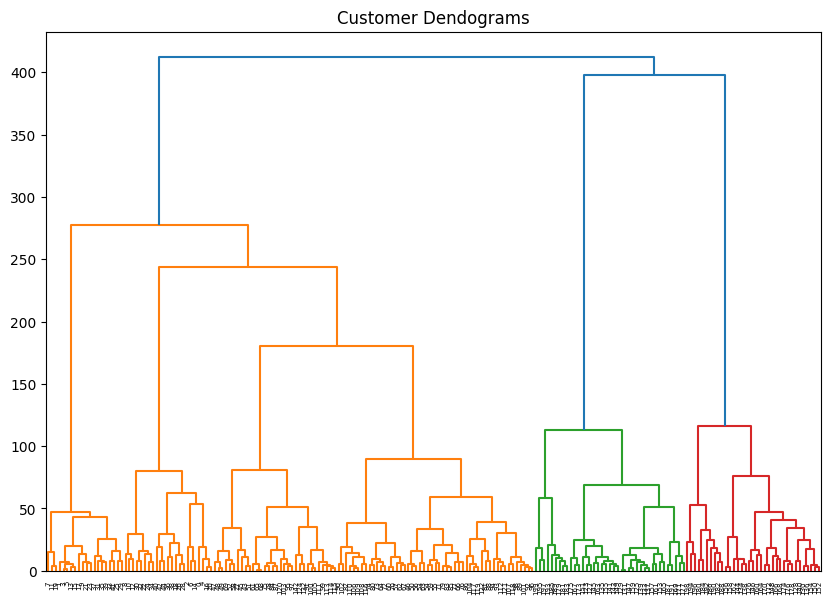

In [38]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster.fit_predict(X)
# get clustering labels
cluster.labels_

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

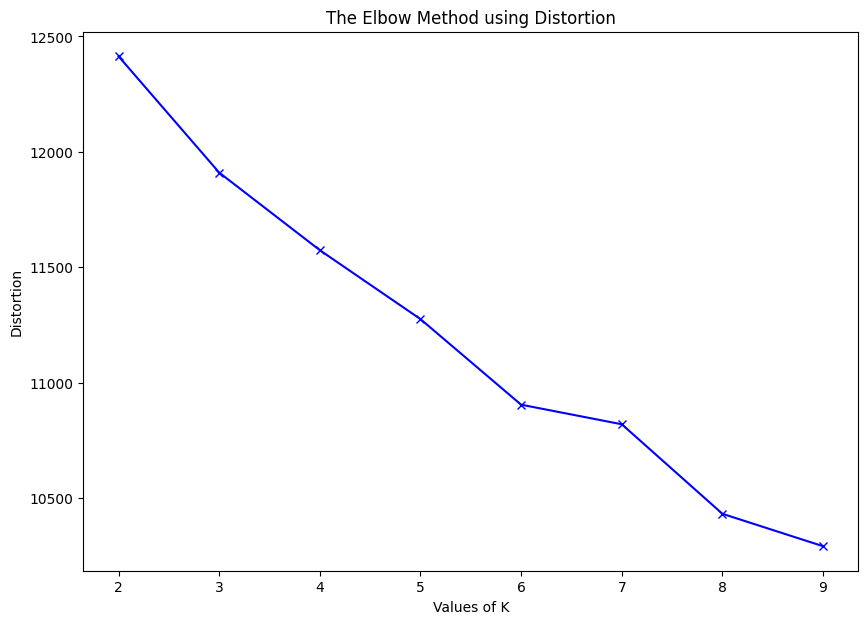

In [31]:
#code
# chuan hoa du lieu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
sse = []
for k in range(2, 10):
 kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=3, copy_x=True, algorithm='lloyd')
 kmeans.fit(scaled_features)
 # 2.1 Khoang cach toi toan bo centroids
 d2centroids = cdist(scaled_features, kmeans.cluster_centers_, 'euclidean')
 # 2.2 Khoang cach toi centroid gan nhat
 min_distance = np.min(d2centroids, axis=1)
 loss = np.sum(min_distance)
 sse.append(loss)
plt.figure(figsize=(10, 7))
plt.plot(np.arange(2, 10), sse, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [39]:
# code
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
labels = model.fit_predict(X)
print(labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


#Finally,
Save a copy in your Github. Remember renaming the notebook.